In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Fingertips\Python\Project\project3\Python_Linear_Regres.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [8]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='age', ylabel='children'>

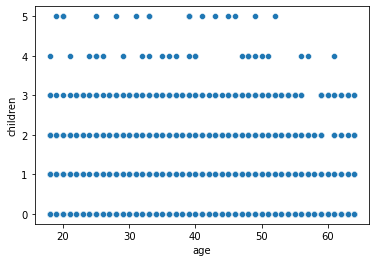

In [9]:
sns.scatterplot(df.age,df.children)

<AxesSubplot:xlabel='children', ylabel='bmi'>

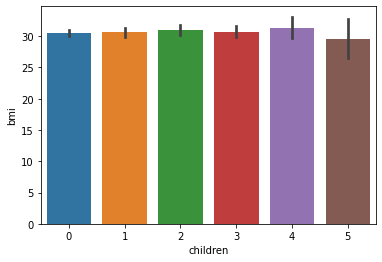

In [11]:
sns.barplot(df.children,df.bmi)

In [14]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
df = scaler.fit_transform(df)

In [19]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [20]:
X = df.drop('charges',axis=1)
Y = df['charges']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [23]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
428,21,16.815,1,0,0,0,0,0
226,28,38.060,0,1,0,0,1,0
867,57,43.700,1,1,0,0,0,1
397,21,31.020,0,1,0,0,1,0
300,36,27.550,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1180,42,41.325,1,0,0,0,0,0
1147,20,31.920,0,0,0,1,0,0
527,51,25.800,1,0,0,0,0,1
1149,42,34.100,0,1,0,0,0,1


In [24]:
Y_train

428      3167.45585
226      2689.49540
867     11576.13000
397     16586.49771
300      6746.74250
           ...     
1180     7650.77375
1147     2261.56880
527      9861.02500
1149     5979.73100
1289     7147.47280
Name: charges, Length: 936, dtype: float64

In [25]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
7,37,27.740,3,0,0,1,0,0
999,36,26.885,0,0,0,1,0,0
1209,59,37.100,1,1,0,0,0,1
491,61,25.080,0,0,0,0,1,0
625,29,26.030,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
854,49,23.845,3,0,1,0,0,0
554,25,41.325,0,0,0,0,0,0
1278,39,29.925,1,1,1,0,0,0
374,20,33.330,0,1,0,0,1,0


In [26]:
Y_test

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
           ...     
854     24106.91255
554     17878.90068
1278    22462.04375
374      1391.52870
6        8240.58960
Name: charges, Length: 402, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
regression_model = LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

In [33]:
predict = regression_model.predict(X_test)
predict

array([ 8.66289282e+03,  6.26149431e+03,  1.53313271e+04,  1.12990250e+04,
        4.10416942e+03,  9.57752620e+03,  9.56569870e+03,  2.59094718e+04,
        7.62208200e+03,  3.10799083e+04,  2.14334545e+03,  3.99246123e+03,
        7.30149883e+03,  1.13256517e+04,  1.29041731e+04,  1.16813258e+04,
        5.36823028e+03,  1.85486140e+04,  1.08112315e+04,  3.10508380e+04,
        3.43191010e+04,  4.55808378e+03,  1.01652873e+03,  7.28410920e+03,
        4.22426246e+03,  1.39159479e+04,  1.19491240e+04,  1.10484079e+04,
        6.44017438e+03,  3.13120055e+04, -1.85498859e+03,  3.43195681e+04,
        9.33037680e+03,  7.46462557e+03,  7.84810049e+03,  1.18435520e+04,
        1.39822142e+04,  1.27153565e+04,  9.89951018e+03,  8.63262584e+03,
        1.58561262e+04,  1.04219306e+04,  5.90420147e+03,  1.14191356e+04,
        5.05537706e+03,  7.22720850e+03,  6.64277928e+03,  3.45533575e+04,
        1.11096068e+04,  1.11677945e+04,  3.29001385e+04,  5.25242199e+03,
        1.04388544e+04,  

In [34]:
regression_model.score(X_train,Y_train)

0.7618780003618578

In [35]:
regression_model.score(X_test,Y_test)

0.7166124432331724

In [36]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [38]:
print(mean_squared_error(Y_test,predict))

36800107.8880156


In [39]:
print(mean_absolute_error(Y_test,predict))

4226.647664219902


In [40]:
print(r2_score(Y_test,predict))

0.7166124432331724
